In [1]:
!pip install livelossplot
import tensorflow as tf
from tensorflow import keras
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
(train_images, train_labels),  (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

4422102/4422102 [==============================] - 0s 0us/step


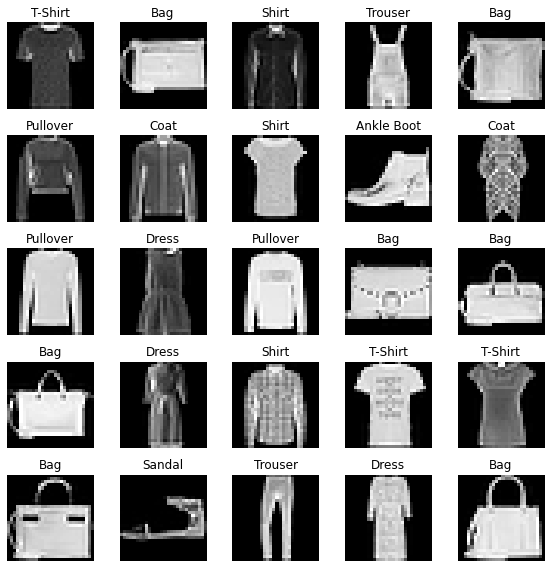

In [3]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28, 28])
    label = labels_map[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Placing batch normalization layer before the activation layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.Dense(200, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [5]:
model.layers[2].variables

[<tf.Variable 'batch_normalization/gamma:0' shape=(300,) dtype=float32, numpy=
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1

In [6]:
for variable in model.layers[2].variables:
    print(variable.name)

batch_normalization/gamma:0
batch_normalization/beta:0
batch_normalization/moving_mean:0
batch_normalization/moving_variance:0


In [7]:
sgd = keras.optimizers.legacy.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


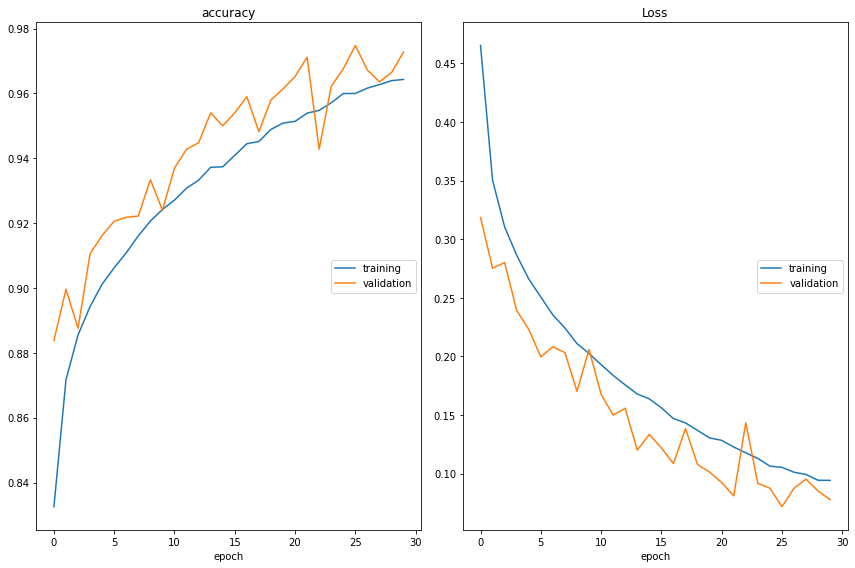

accuracy
	training         	 (min:    0.833, max:    0.964, cur:    0.964)
	validation       	 (min:    0.884, max:    0.975, cur:    0.973)
Loss
	training         	 (min:    0.094, max:    0.465, cur:    0.094)
	validation       	 (min:    0.072, max:    0.319, cur:    0.078)
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0941 - accuracy: 0.9643 - val_loss: 0.0777 - val_accuracy: 0.9728


In [8]:
model.fit(train_images, train_labels, epochs=30, callbacks=[PlotLossesKeras()],validation_data=(validation_images, validation_labels))

In [9]:
loss, acc = model.evaluate(test_images, test_labels)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.4519 - accuracy: 0.8884
test loss is 0.4519331157207489
test accuracy is 0.8884000182151794


Here validation loss is 0.07, training loss is 0.09 but loss on test data is 0.45, so we can sy that model is overfitting

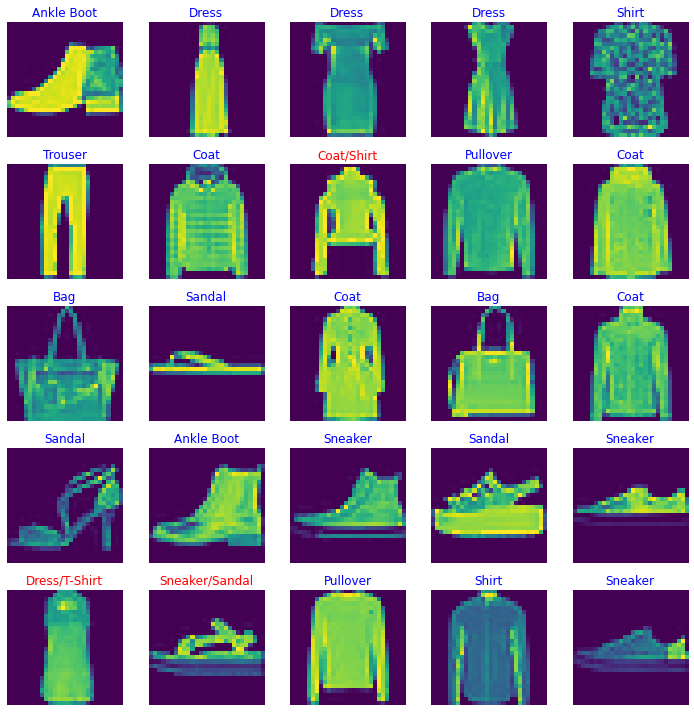

In [10]:
test_batch_size = 25
batch_index = np.random.choice(len(test_images), size=test_batch_size, replace=False)

batch_xs = test_images[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')
plt.tight_layout()

In [11]:
# Placing batch normalization layer after the activation layers
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, use_bias=False),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [12]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

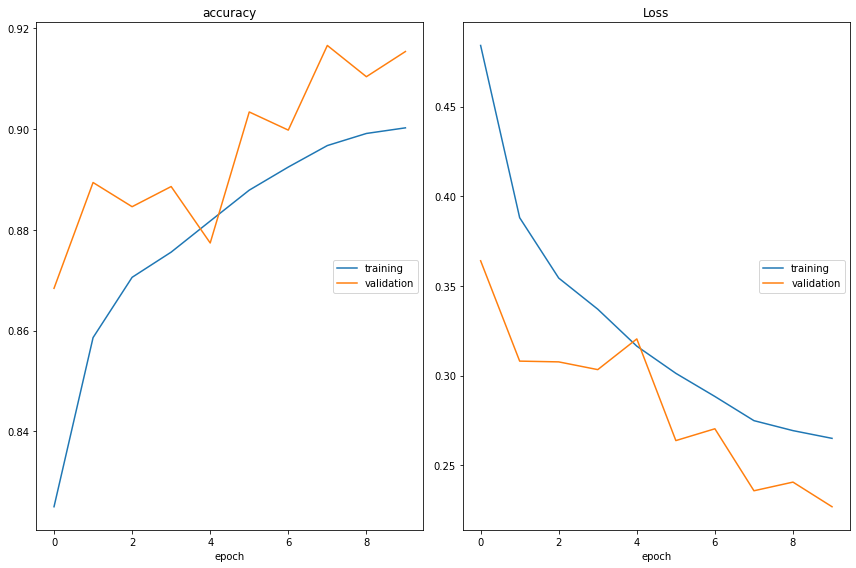

accuracy
	training         	 (min:    0.825, max:    0.900, cur:    0.900)
	validation       	 (min:    0.868, max:    0.917, cur:    0.915)
Loss
	training         	 (min:    0.265, max:    0.484, cur:    0.265)
	validation       	 (min:    0.227, max:    0.364, cur:    0.227)
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2650 - accuracy: 0.9003 - val_loss: 0.2269 - val_accuracy: 0.9154


In [13]:
model2.fit(train_images, train_labels, epochs=10, callbacks=[PlotLossesKeras()],validation_data=(validation_images, validation_labels))

In [14]:
loss, acc = model2.evaluate(test_images, test_labels)

print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.3389 - accuracy: 0.8808
test loss is 0.3388809561729431
test accuracy is 0.8808000087738037


Here we can observe that training loss is 0.26, validation loss is 0.22 and test loss is 0.33. So, we can say that model is neither underfitting nor overfitting. It is perfect fit.

In [15]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
heart = pd.read_csv('/content/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
heart['Sex'] = heart['Sex'].map({'M': 1, 'F': 0})
heart['ExerciseAngina'] = heart['ExerciseAngina'].map({'Y': 1, 'N': 0})
heart['ChestPainType'] = heart['ChestPainType'].map({'ATA': 0, 'NAP': 1,'ASY':2, 'TA': 3})
heart['RestingECG'] = heart['RestingECG'].map({'Normal': 0, 'ST': 1,'LVH':2})
heart['ST_Slope'] = heart['ST_Slope'].map({'Down': 0, 'Flat': 1,'Up':2})





In [18]:
data = heart[~heart.isin(['?'])]
data.loc[280:]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
280,60,1,1,120,246,0,2,135,0,0.0,2,0
281,49,1,2,150,222,0,0,122,0,2.0,1,1
282,51,0,1,130,220,0,0,160,1,2.0,2,0
283,55,0,0,110,344,0,1,160,0,0.0,2,0
284,42,1,2,140,358,0,0,170,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,0,132,0,1.2,1,1
914,68,1,2,144,193,1,0,141,0,3.4,1,1
915,57,1,2,130,131,0,0,115,1,1.2,1,1
916,57,0,0,130,236,0,2,174,0,0.0,1,1


In [19]:
data = data.dropna(axis=0)
data.loc[280:]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
280,60,1,1,120,246,0,2,135,0,0.0,2,0
281,49,1,2,150,222,0,0,122,0,2.0,1,1
282,51,0,1,130,220,0,0,160,1,2.0,2,0
283,55,0,0,110,344,0,1,160,0,0.0,2,0
284,42,1,2,140,358,0,0,170,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,0,132,0,1.2,1,1
914,68,1,2,144,193,1,0,141,0,3.4,1,1
915,57,1,2,130,131,0,0,115,1,1.2,1,1
916,57,0,0,130,236,0,2,174,0,0.0,1,1


In [20]:
print(data.shape)
print(data.dtypes)

(918, 12)
Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


In [21]:
data = data.apply(pd.to_numeric)
data.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [22]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.452070,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


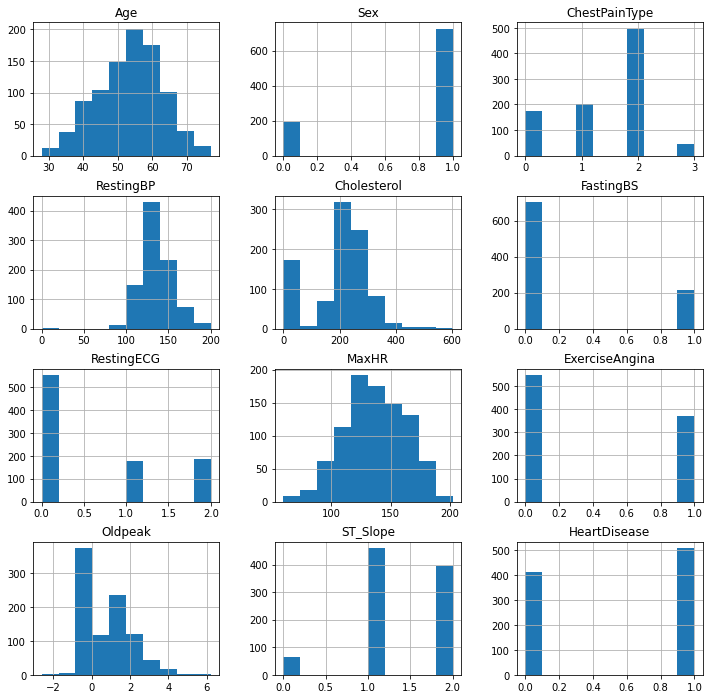

In [23]:
data.hist(figsize = (12, 12))
plt.show()

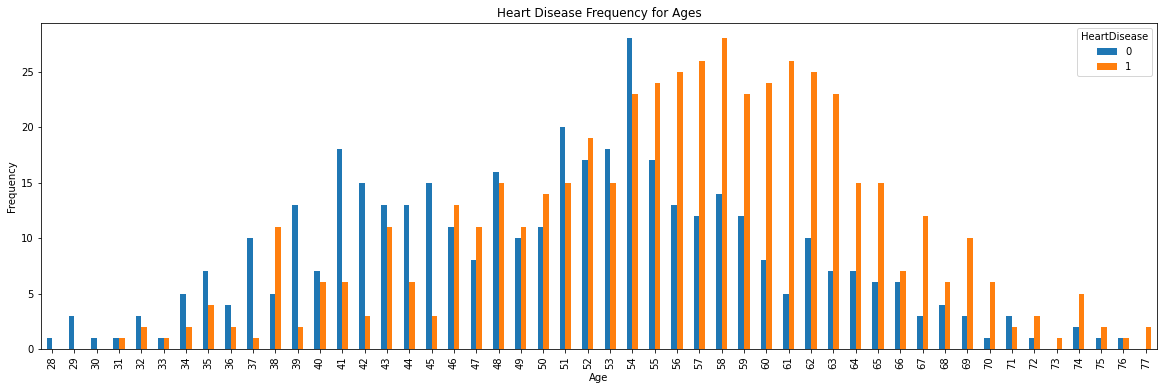

In [24]:
pd.crosstab(data.Age,data.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

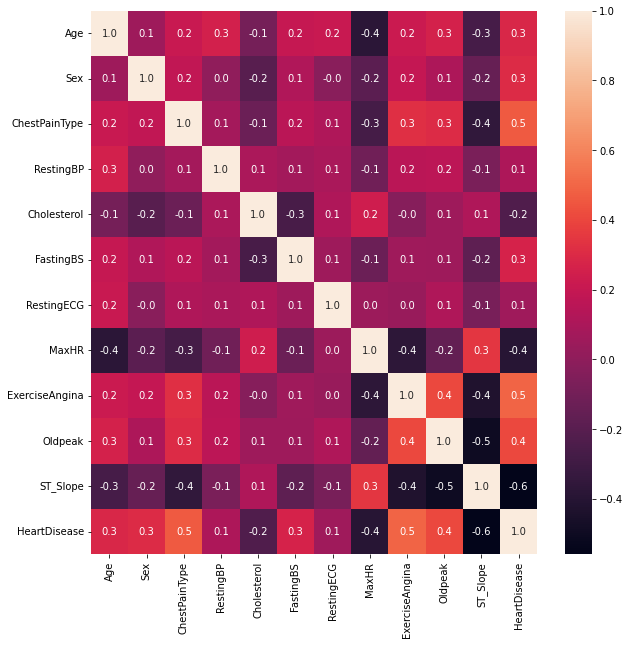

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

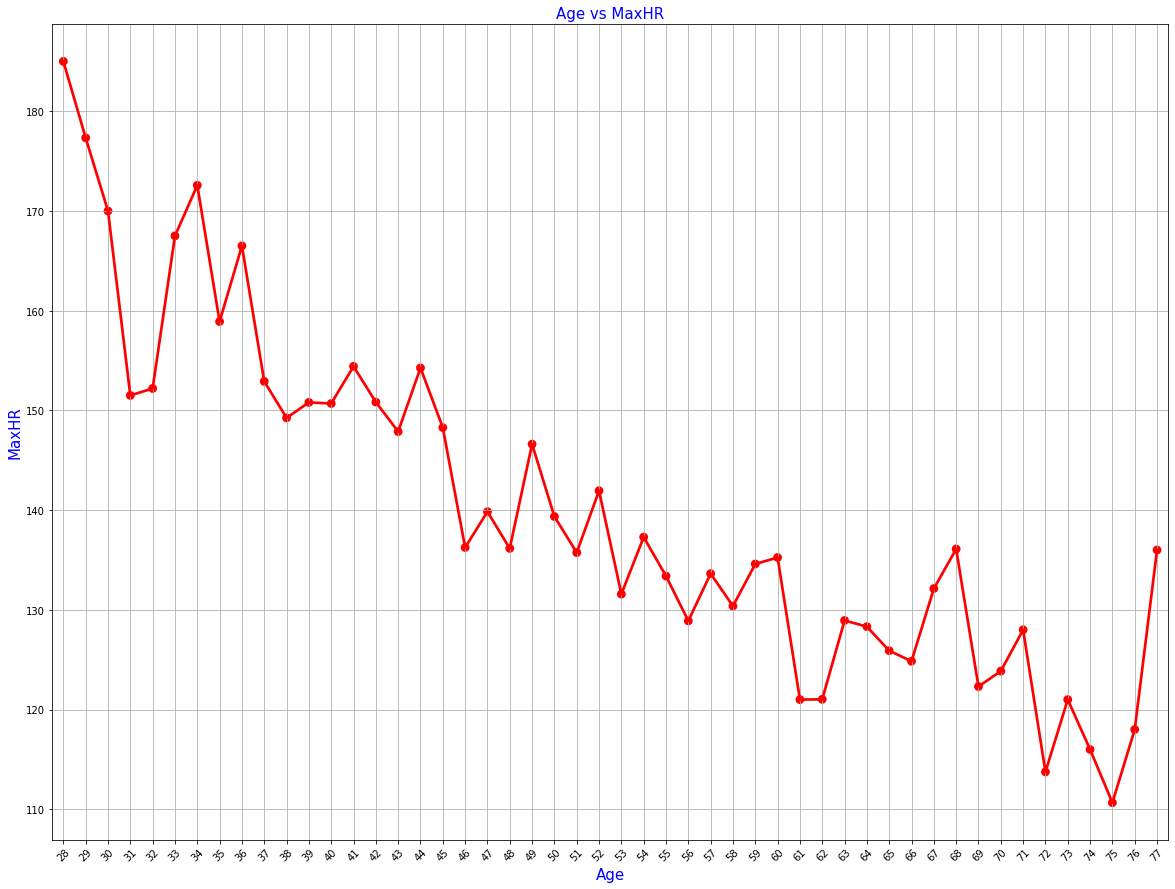

In [26]:
age_unique=sorted(data.Age.unique())
age_MaxHR_values=data.groupby('Age')['MaxHR'].count().values
mean_MaxHR=[]
for i,Age in enumerate(age_unique):
    mean_MaxHR.append(sum(data[data['Age']==Age].MaxHR)/age_MaxHR_values[i])
    
plt.figure(figsize=(20,15))
sns.pointplot(x=age_unique,y=mean_MaxHR,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('MaxHR',fontsize = 15,color='blue')
plt.title('Age vs MaxHR',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [27]:
X = np.array(data.drop(['HeartDisease'], 1))
y = np.array(data['HeartDisease'])

<ipython-input-27-f3586c44f829>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['HeartDisease'], 1))


In [28]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [29]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [30]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(734, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [32]:
model = Sequential()
model.add(Dense(16, input_dim=11, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                192       
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 8)                

In [34]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
74/74 [==============================] - 2s 8ms/step - loss: 0.6169 - accuracy: 0.7016 - val_loss: 0.6673 - val_accuracy: 0.5543
Epoch 2/50
74/74 [==============================] - 0s 4ms/step - loss: 0.5300 - accuracy: 0.7670 - val_loss: 0.6333 - val_accuracy: 0.5978
Epoch 3/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.7970 - val_loss: 0.5801 - val_accuracy: 0.8152
Epoch 4/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4310 - accuracy: 0.8052 - val_loss: 0.4992 - val_accuracy: 0.8478
Epoch 5/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.8365 - val_loss: 0.4358 - val_accuracy: 0.8750
Epoch 6/50
74/74 [==============================] - 0s 4ms/step - loss: 0.3851 - accuracy: 0.8338 - val_loss: 0.4059 - val_accuracy: 0.8696
Epoch 7/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4301 - accuracy: 0.8351 - val_loss: 0.3824 - val_accuracy: 0.8859
Epoch 8/50
74/74 [==

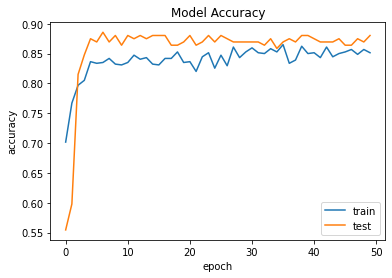

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

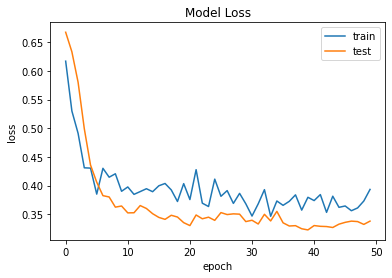

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Here, we can see that training loss is 0.39 and test/val loss is 0.33. So, the model is perfect fit

In [37]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1]


In [38]:
binary_model = Sequential()
binary_model.add(Dense(16, input_dim=11, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
binary_model.add(BatchNormalization())
binary_model.add(Dropout(0.25))
binary_model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
binary_model.add(BatchNormalization())
binary_model.add(Dropout(0.25))
binary_model.add(Dense(1, activation='sigmoid'))

In [39]:
adam = Adam(lr=0.001)
binary_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()    


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                192       
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 8)                

In [40]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
74/74 [==============================] - 2s 7ms/step - loss: 0.6026 - accuracy: 0.7221 - val_loss: 0.6620 - val_accuracy: 0.7228
Epoch 2/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4632 - accuracy: 0.7929 - val_loss: 0.6196 - val_accuracy: 0.8152
Epoch 3/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4440 - accuracy: 0.8215 - val_loss: 0.5464 - val_accuracy: 0.8696
Epoch 4/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4596 - accuracy: 0.8134 - val_loss: 0.4671 - val_accuracy: 0.8804
Epoch 5/50
74/74 [==============================] - 0s 5ms/step - loss: 0.4567 - accuracy: 0.8147 - val_loss: 0.3976 - val_accuracy: 0.8804
Epoch 6/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.8324 - val_loss: 0.3577 - val_accuracy: 0.8859
Epoch 7/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8338 - val_loss: 0.3412 - val_accuracy: 0.8804
Epoch 8/50
74/74 [==

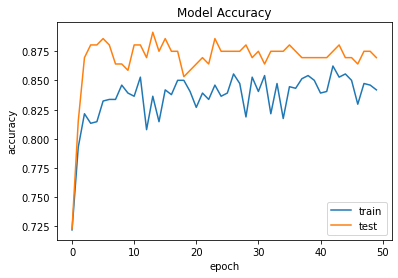

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

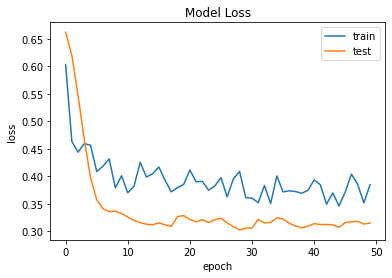

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Here we can observe that train loss is 0.38 and val loss is 0.31. There is a difference. So, we can say that it is neither underfitting nor overfitting.

In [43]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

6/6 [==============================] - 0s 3ms/step
Results for Categorical Model
0.8804347826086957
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



In [44]:
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

6/6 [==============================] - 0s 3ms/step
Results for Binary Model
0.8695652173913043
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        82
           1       0.86      0.91      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

